<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

# Problem Set 02

Welcome to your second assignment. This exercise gives you a brief introduction to Python. 


STUDENT NAME: Sepehr Kazemi Ranjbar

STUDENT ID: 99106599

## Import 
>Put all of your imports for this file in the below cell.

In [3]:
### START CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### END CODE HERE ###

# Question 1

## Array creation
>Create the followings to numpy array:
* A: a 3\*3 array like this:
$$
A = \left(\begin{array}{cc} 
10 & 20 & 30\\
5 & 10 & 15\\
1 & 5 & 8
\end{array}\right)
$$ 
* B: a 3\*3\*4 that filled with the numbers start from 15 and have steps of 5 to the end. The array should be filled first along the first dimension then the second dimension and at last the third dimension. like this:
$$
B[:, :, 0] = \left(\begin{array}{cc} 
15 & 30 & 45\\
20 & 35 & 50\\
25 & 40 & 55
\end{array}\right)
$$ 

In [49]:
### START CODE HERE ###
A = np.array([[10,20,30],[5,10,15],[1,5,8]])
B = np.arange(15,36*5+15,5).reshape((3,3,4),order='F')
### END CODE HERE ###

## Replacement
>Replace the last slice of array B (B[:, :, 3]) with values of A. Then print the result.

In [50]:
### START CODE HERE ###
B[:,:,3] = A
B[:,:,3]
### END CODE HERE ###

array([[10, 20, 30],
       [ 5, 10, 15],
       [ 1,  5,  8]])

## Axis Swap 
>Swap the first(B[:, :, 0]) and last(B[:, :, 3]) slice of the array B **only with one line of code**. Then print the result.

In [55]:
### START CODE HERE ###
B[:,:,0],B[:,:,3] = B[:,:,3].copy(),B[:,:,0].copy()
print('B[:,:,0] =\n',B[:,:,0],'\nB[:,:,3] =\n',B[:,:,3])
### END CODE HERE ###

B[:,:,0] =
 [[10 20 30]
 [ 5 10 15]
 [ 1  5  8]] 
B[:,:,3] =
 [[15 30 45]
 [20 35 50]
 [25 40 55]]


## Transposing 
>Transpose the array B elements in each slice. Then print the result.

In [57]:
### START CODE HERE ###
B[:,:,0] = B[:,:,0].transpose()
B[:,:,1] = B[:,:,1].transpose()
B[:,:,2] = B[:,:,2].transpose()
B[:,:,3] = B[:,:,3].transpose()
print('B[:,:,0] =\n',B[:,:,0],'\nB[:,:,1] =\n',B[:,:,1],'B[:,:,2] =\n',B[:,:,2],'\nB[:,:,3] =\n',B[:,:,3])
### END CODE HERE ###

B[:,:,0] =
 [[10 20 30]
 [ 5 10 15]
 [ 1  5  8]] 
B[:,:,1] =
 [[ 60  65  70]
 [ 75  80  85]
 [ 90  95 100]] B[:,:,2] =
 [[105 110 115]
 [120 125 130]
 [135 140 145]] 
B[:,:,3] =
 [[15 20 25]
 [30 35 40]
 [45 50 55]]


## Matrix Multiplication
>Calculate the matrix multiplication of all slices of the array B. 
(B[:, :, 0] \* B[:, :, 1] \* B[:, :, 2] \* B[:, :, 3]). Then print the result.

>**Note**: the result should be a 3\*3 array. 

In [63]:
### START CODE HERE ###
B[:,:,0] @ B[:,:,1] @ B[:,:,2] @ B[:,:,3]
### END CODE HERE ###

array([[175230000, 204052500, 232875000],
       [ 87615000, 102026250, 116437500],
       [ 42084000,  49006125,  55928250]])

## Determinant
>Calculate the determinant of the array A and print it.

In [64]:
### START CODE HERE ###
np.linalg.det(A)
### END CODE HERE ###

0.0

# Question 2

## Loading dataset
>Load the IMDB-Movie-Data.csv file into a pandas dataframe and show its first 5 rows. Each row of this dataframe corresponds to one film.

In [2]:
### START CODE HERE ###
movies = pd.read_csv('IMDB-Movie-Data.csv')
movies.iloc[0:5]
### END CODE HERE ###

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Actors/Actresses Activity
>For each Actors/Actresses caculate the number of movies in the dataframe, then sort the actors/actresses first by their number of movies in descending order and then by their name in ascending order. 

In [4]:
### START CODE HERE ###
actors = movies['Actors'].str.split(',',expand=True)
actors[actors.columns] = np.char.strip(actors.values.astype(str))
actors.columns = ['Actor1','Actor2','Actor3','Actor4']
expanded_df = pd.concat([movies,actors],axis=1)
help = pd.Series(data=np.char.strip(actors.values.astype(str)).reshape(4000)).unique()
actors_name = pd.Series(data=np.zeros(len(help)),index = help)
t1 = expanded_df['Actor1'].value_counts()
t2 = expanded_df['Actor2'].value_counts()
t3 = expanded_df['Actor3'].value_counts()
t4 = expanded_df['Actor4'].value_counts()
for name in actors_name.index:
    try:
        actors_name[name] += t1[name]
    except Exception as e:
        ...
    try:
        actors_name[name] += t2[name]
    except Exception as e:
        ...
    try:
        actors_name[name] += t3[name]
    except Exception as e:
        ...
    try:
        actors_name[name] += t4[name]
    except Exception as e:
        ...
actors_name = pd.DataFrame(actors_name)
actors_name.columns = ['count']
descending_order =  actors_name.sort_values('count',ascending=False)
ascending_order = actors_name.sort_values('count')
### END CODE HERE ###

## Score Histogram
>Draw the histogram of metascores and ratings. 

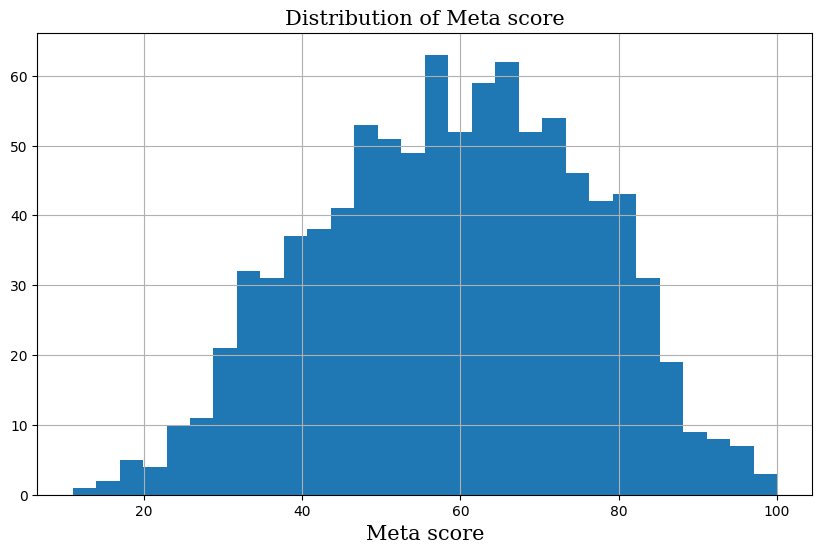

In [33]:
### START CODE HERE ###
# Historgram of Meta score
plt.figure(figsize=(10,6))
plt.hist(movies['Metascore'],bins=30)
plt.grid('minor')
plt.xlabel("Meta score",fontdict={'size':15,'family':'serif'})
plt.title("Distribution of Meta score",fontdict={'size':15,'family':'serif'})
plt.show()
### END CODE HERE ###

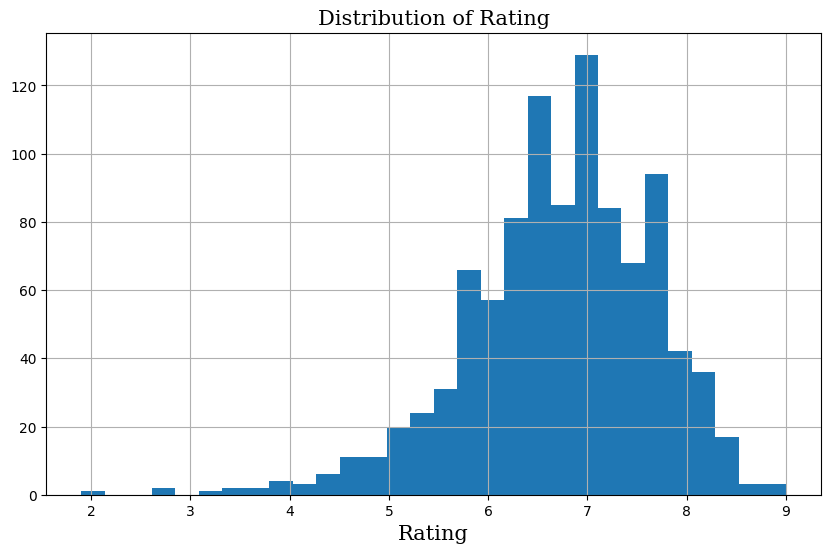

In [37]:
# Histogram of Rating
plt.figure(figsize=(10,6))
plt.hist(movies['Rating'],bins=30)
plt.grid('minor')
plt.xlabel("Rating",fontdict={'size':15,'family':'serif'})
plt.title("Distribution of Rating",fontdict={'size':15,'family':'serif'})
plt.show()

## Correlations
>Calculate the correlation between rating, votes and metascore of the movies.
Is there any meaningful relation between these features? 

In [42]:
### START CODE HERE ###
corr_12 = movies['Rating'].corr(movies['Votes'])
corr_13 = movies['Rating'].corr(movies['Metascore'])
corr_23 = movies['Votes'].corr(movies['Metascore'])
corr_matrix = pd.DataFrame([[1,corr_12,corr_13],[corr_12,1,corr_23],[corr_13,corr_23,1]],index=['Rating','Votes','Metascore'],columns=['Rating','Votes','Metascore'])
corr_matrix
### END CODE HERE ###

,Rating,Votes,Metascore
Rating,1.000000,0.511537,0.631897
Votes,0.511537,1.000000,0.325684
Metascore,0.631897,0.325684,1.000000


# Question 3

## File
> Craet a .txt file and name it "Name_actors". You must write the name of all actors/actresses in the IMDB-Movie-Data.csv file. Don't write a name multiple time and write each name in a new line.

In [55]:
### START CODE HERE ###
# we use help that we define in question 2, it contains all actors unique
myFile = open('Name_actors.txt','w')
np.savetxt(myFile,help,fmt='%s')
myFile.close()
### END CODE HERE ###

# Question 4

## Plot
>You must plot the number of movies in each year according to the IMDB-Movie-Data.csv file. X-axis is year and y-axis show the number of movies in each year.
> set the x_label, y_label and title for your plot.

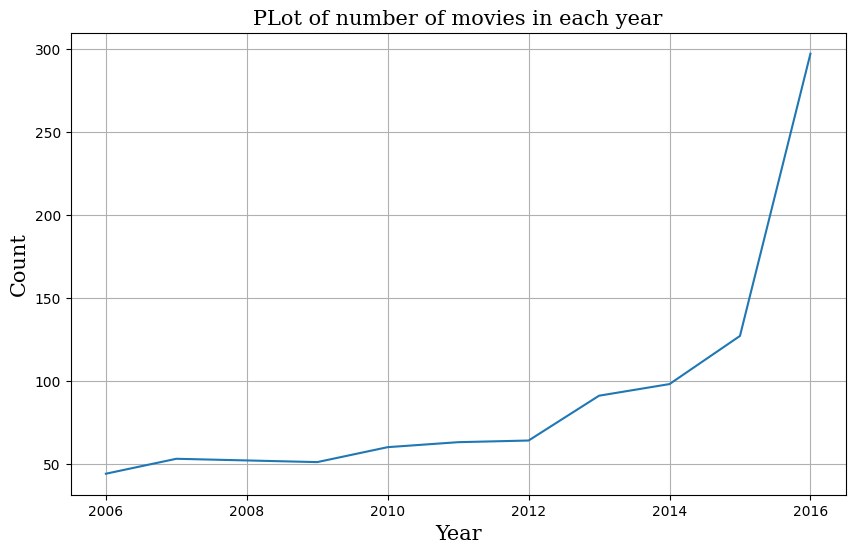

In [64]:
### START CODE HERE ###
movies_count = movies.groupby('Year').count()['Rank']
plt.figure(figsize=(10,6))
plt.plot(movies_count.index,movies_count.values)
plt.grid('minor')
plt.xlabel("Year",fontdict={'size':15,'family':'serif'})
plt.ylabel("Count",fontdict={'size':15,'family':'serif'})
plt.title("PLot of number of movies in each year",fontdict={'size':15,'family':'serif'})
plt.show()
### END CODE HERE ###

## Plot
>You must plot the cos(x) curve. plot 20 cycle of the curve. the frequency of first half of curve is 50 Hz and frequency of second lalf is 200 Hz. 
> set the x_label, y_label and title for your plot.

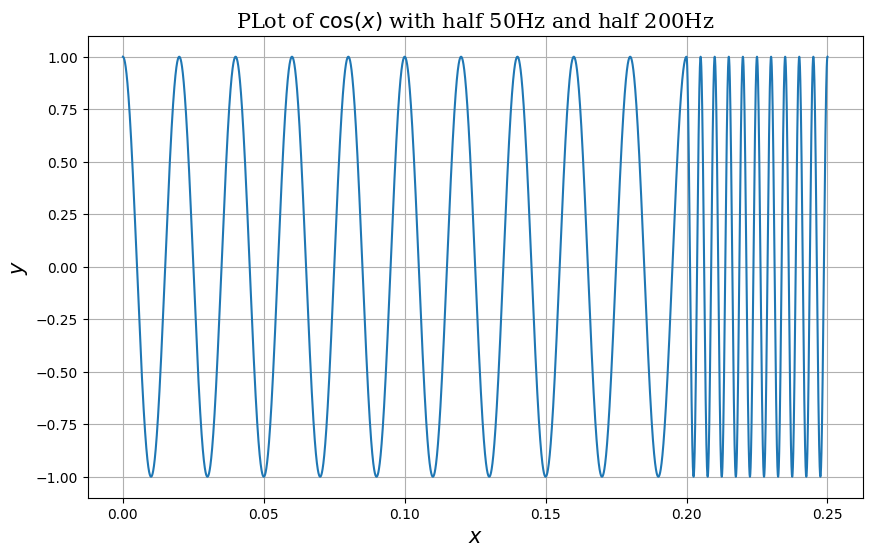

In [137]:
### START CODE HERE ###
# Here 10 cycle is with 50Hz and 10 cycle is with 200Hz
step = 10**(-6)
x1 = np.arange(0,0.2,step)
x2 = np.arange(0.2+step,0.25+step,step)
y1 = np.cos(2*np.pi*50*x1)
y2 = np.cos(2*np.pi*200*x2)
x = np.concatenate([x1,x2])
y = np.concatenate([y1,y2])
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.grid('minor')
plt.xlabel("$x$",fontdict={'size':15,'family':'serif'})
plt.ylabel("$y$",fontdict={'size':15,'family':'serif'})
plt.title("PLot of $\cos(x)$ with half 50Hz and half 200Hz",fontdict={'size':15,'family':'serif'})
plt.show()
### END CODE HERE ###

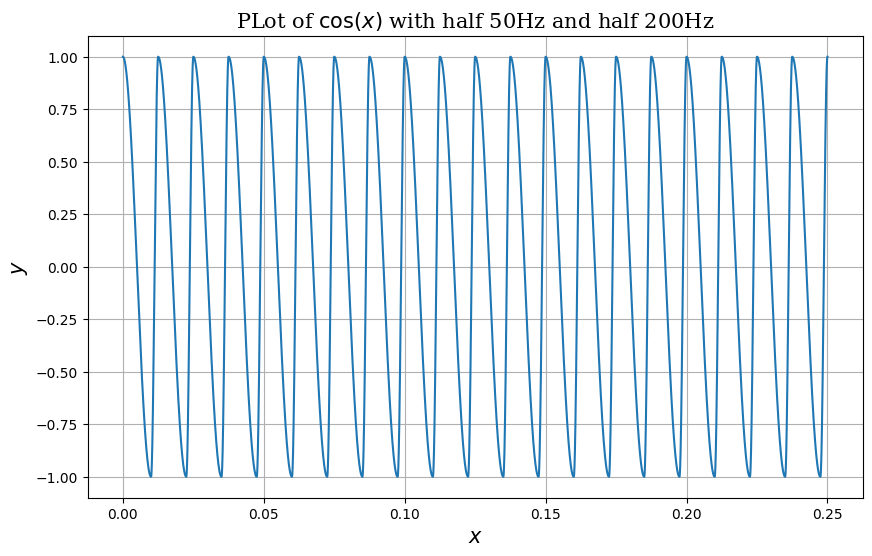

In [138]:
# Here half of 1 cycle is with 50Hz and other Half is with 200Hz, then repeate the 20 times
step = 10**(-6)
x1 = np.arange(0,0.01,step)
x2 = np.arange(0.01,0.01+0.0025-step,step)
y1 = np.cos(2*np.pi*50*x1)
y2 = -np.cos(2*np.pi*200*x2)
x = np.concatenate([x1,x2])
y = np.concatenate([y1,y2])
X = x
Y = np.tile(y,20)
for i in range(1,20):
    X = np.concatenate([X,x+i*0.0125])
plt.figure(figsize=(10,6))
plt.plot(X,Y)
plt.grid('minor')
plt.xlabel("$x$",fontdict={'size':15,'family':'serif'})
plt.ylabel("$y$",fontdict={'size':15,'family':'serif'})
plt.title("PLot of $\cos(x)$ with half 50Hz and half 200Hz",fontdict={'size':15,'family':'serif'})
plt.show()